In [1]:
## IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
## IMPORTAÇÃO DO ARQUIVO DE DADOS
data = pd.read_csv('Downloads/log_usuarios/log_usuarios.csv', ';')

In [3]:
## CONVERTE A COLUNA PARA FORMATO DE DATA
data.data_consulta = pd.to_datetime(data.data_consulta, format='%d/%m/%Y %H:%M')

## FORMATA COMO ANO E MÊS
data['data_consulta'] = data['data_consulta'].dt.strftime('%Y%m')

## AGRUPA OS DADOS POR MÊS E IDs ÚNICOS DE USUÁRIOS
data = data.groupby(['data_consulta']).useriD.nunique().reset_index() # nunique()/count()

## VISUALIZA OS DADOS IMPORTADOS/TRATADOS
print(data.head())
print('\n Data Types:')
print(data.dtypes)

  data_consulta  useriD
0        202106      85
1        202107     381
2        202108     422
3        202109     227

 Data Types:
data_consulta    object
useriD            int64
dtype: object


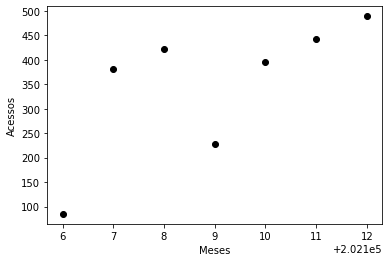

In [4]:
## CONVERTE OS VALORES DA COLUNA ANO/MÊS PARA INTEIRO
data_consulta = data.data_consulta.astype(int).values

## MODIFICA FORMATO DA MATRIZ PARA CONTER APENAS UMA COLUNA
data_consulta = data_consulta.reshape(4,1)

## INSERE CADA COLUNA EM UM NUMPY ARRAY
meses = np.array(data_consulta) 
acessos = np.array(data.useriD)

## CRIAÇÃO DO MODELO DE REGRESSÃO LINEAR
regr = linear_model.LinearRegression()

## FAZ O TREINAMENTO COM OS DADOS DISPONÍVEIS
regr.fit(meses, acessos)

## PREVÊ OS ACESSOS PARA OS PRÓXIMOS MESES
acessos_out_prev = regr.predict([[202110]])
acessos_nov_prev = regr.predict([[202111]])
acessos_dez_prev = regr.predict([[202112]])

## CONCATENA OS VALORES PREDITOS NOS ARRAYS PARA PLOTAGEM DO GRÁFICO
meses = np.append(meses,[202110])
meses = np.append(meses,[202111])
meses = np.append(meses,[202112])

acessos = np.append(acessos,[acessos_out_prev])
acessos = np.append(acessos,[acessos_nov_prev])
acessos = np.append(acessos,[acessos_dez_prev])

## PLOTAGEM DO GRÁFICO
plt.scatter(meses, acessos,  color='black')

plt.xlabel('Meses')
plt.ylabel('Acessos')

plt.show()